# MDI220
# Statistiques

# Mini-project

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: DAGHMOURA Haithem

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [238]:
from scipy.stats import norm, chi2, gaussian_kde

In [239]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [240]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [241]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [242]:
regions = list(df.region.unique())

In [243]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [244]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [245]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [246]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]
df.columns

Index(['region', 'date', 'consumption'], dtype='object')

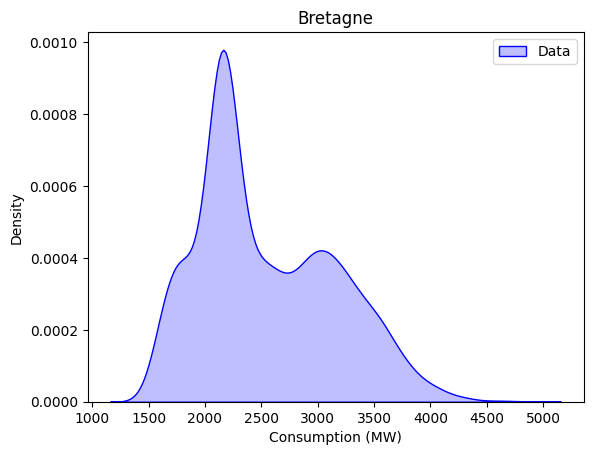

In [247]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne.

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse : Question 1
- Montrons que l'estimateur de la moyenne est sans biais:
$$ \begin{align}
E(\hat \mu ) &= E(\frac 1 n \sum_{i=1}^n X_i) = \frac 1 n \sum_{i=1}^n E(X_i)\\&= \frac 1 n \sum_{i=1}^n \mu = \frac 1 n n \mu \\  &= μ\\
\end{align} $$
Donc l'estimateur de l'espèrence est sans biais.
-Montrons que l'estimateur de la variance est sans biais: ( on note par $v = \sigma ^2$ la variance de X )
$$ \begin{align}
E(\hat {σ^2} ) &= E(\frac 1 {n-1} \sum_{i=1}^n(X_i - \hat \mu )^2 )\\ &=\frac 1 {n-1} \sum_{i=1}^n [E(X_i^2)-2E(\hat \mu X_i)+E(\hat \mu^2)] \end{align}
$$
Calculons maitnenant chaque terme de la somme:
$$
\begin{align}
*E(X_i^2)&=Var(X_i) +E(X_i)^2\\
&= v+\mu^2\\
*E(\hat \mu^2 ) &= Var(\hat \mu)+E(\hat \mu )^2\\
&= Var(\frac 1 n \sum_{i=1}^n X_i)+E(\hat \mu )^2\\
&= \frac 1 {n^2} \sum_{i=1}^n Var(X_i) + E(\hat \mu )^2\\
&= \frac 1 {n}v+\mu^2
\end{align}
$$ Car les $X_i$ sont independantes

$$
\begin{align}
*E(\hat \mu X_i) &= E(X_i \frac 1 n \sum_{j=1}^n X_j) = \frac 1 n E( \sum_{j=1}^n X_j X_i) \\ &= \frac 1 n  \sum_{j=1}^n E(X_j X_i) = \frac 1 n (\sum_{j=1,j\neq i}^n E(X_j X_i) + E(X_i^2))\\
&= \frac 1 n (\sum_{j=1,j\neq i}^n E(X_j)E(X_i) + E(X_i^2))\\
&= \frac 1 n (\sum_{j=1,j\neq i}^n \mu^2 + v + \mu^2) =  \frac 1 n (n \mu^2 +v)\\ &=\mu^2+\frac 1 n v
\end{align}
$$
Car pour tout $i$ et $j$ different on a $X_i$ et $X_j$ sont independent donc $ E(X_i X_j) = E(X_i)E(X_j)$ \\
Et finallement on obtient on remplacant chaque terme dans la premiere equation :$$
\begin{align}
E(\hat \sigma ^2) &= \frac 1 {n-1}\sum_{i=1}^n [ v+\mu^2-2(\mu^2+\frac 1 n v)+\frac 1 {n}v+\mu^2]\\
&=\frac 1 {n-1}\sum_{i=1}^n [v-\frac 1 n v] = \frac 1 {n-1}\sum_{i=1}^n [\frac {n-1} n v] \\
&= \sum_{i=1}^n [\frac {1} n v]=v = \sigma ^2
\end{align}
 $$
Ainsi l'estimateur de la variance est sans biais

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [248]:
n=df_region["consumption"].count()
moyenne_emprique = df_region["consumption"].sum() / n
variance_emprique =   ((df_region["consumption"]-moyenne_emprique)**2).sum() / (n-1)
print (f"La moyenne obtenu avec cet estimateur est : { moyenne_emprique} \nla variance emprique est {variance_emprique} ")

La moyenne obtenu avec cet estimateur est : 2546.536155666579 
la variance emprique est 365956.0141448174 


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [249]:
# Generate random values
np.random.seed(5)
new_data = np.random.normal(loc=moyenne_emprique, scale=np.sqrt(variance_emprique), size=n)

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

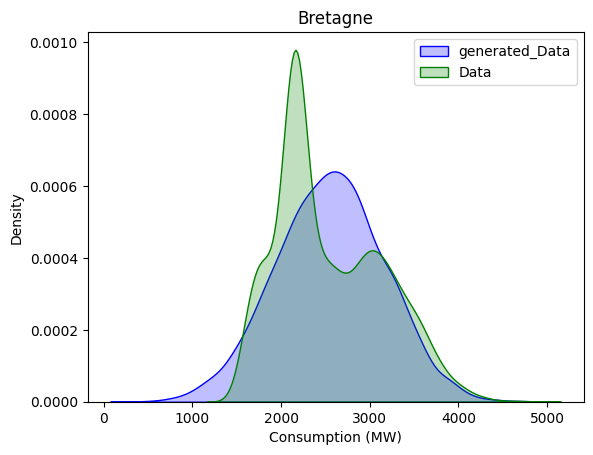

In [250]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=new_data, label="generated_Data", color='blue', fill=True)
sns.kdeplot(data=df_region,x='consumption', label="Data", color='green', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

In [251]:
#convertion du type de date
df_region['date']=pd.to_datetime(df_region['date'])
mask = ((df_region['date'].dt.month <= 2) | ((df_region['date'].dt.month == 3) & (df_region['date'].dt.day <=21)) |   ((df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)))
winter_data =df_region[mask]
winter_data.sample(10)

<ipython-input-251-eb93536d0ce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['date']=pd.to_datetime(df_region['date'])


,region,date,consumption
10958,Bretagne,2022-03-07,3514
9821,Bretagne,2019-01-25,3328
9492,Bretagne,2018-03-02,4041
7672,Bretagne,2013-03-08,2829
9430,Bretagne,2017-12-30,2782
8741,Bretagne,2016-02-10,3493
7630,Bretagne,2013-01-25,4108
10548,Bretagne,2021-01-21,3535
11317,Bretagne,2023-03-01,3657
10233,Bretagne,2020-03-12,2967


La moyenne obtenu avec cet estimateur est : 3214.1782077393077 
la variance emprique est 167670.9009313411 


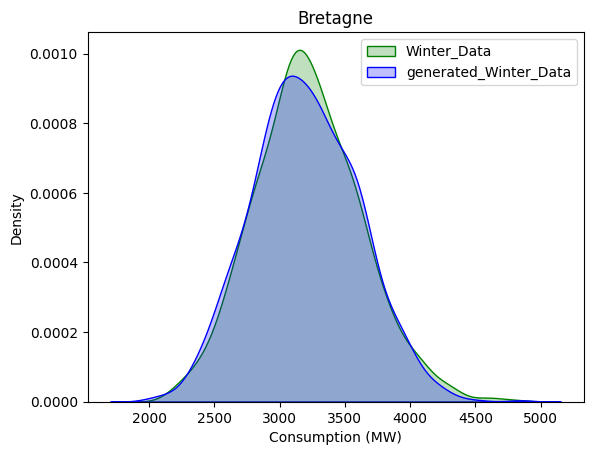

In [252]:
n= winter_data['consumption'].count()
moyenne_emprique2 = winter_data["consumption"].sum() / n
variance_emprique2 =   ((winter_data["consumption"]-moyenne_emprique2)**2).sum() / (n-1)
print (f"La moyenne obtenu avec cet estimateur est : { moyenne_emprique2} \nla variance emprique est {variance_emprique2} ")
new_data = np.random.normal(loc=moyenne_emprique2, scale=np.sqrt(variance_emprique2), size=n)
# density (with kde = kernel density estimation)
sns.kdeplot(data=winter_data, x="consumption", label="Winter_Data", color='green', fill=True)
sns.kdeplot(data=new_data, label="generated_Winter_Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

L'hypothèse gaussienne est plus approprié dans le deuxieme cas. En effet, dans le premier cas, il est claire que l'estimation de densité des données sur toute l'année n'a pas la même allure que celle d'une gaussienne tant dis que l'estimation de densité des données pour la saison d'hiver est proche d'une gaussienne. Donc dans le deuxième cas, il est justifiable de prendre cette hypothèse. En generale il est connu que durant toute l'année la temperature varie d'une facon remarquable. Cette différnce de température influe directement sur la consommation de l'électricité quotidienne car en hiver l'utilisation des chauffages s'accentue. Ainsi la consommation diffère d'une saison à une autre est il est plus adéquat d'etudier le cas de chaque saison séparement où on à peu près les mêmes conditions d'utilisation de l'électricité

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

1. **Montrer que $(d(f,g) \in [0,1])$:** \\
Votre réponse : \\
   Soit f et g deux distribution de porbabilité \\
   Tout d'abord, il est clair que $(d(f,g) \geq 0)$ car $(|f(x) - g(x)|)$ est toujours positif. Il reste à montrer que $(d(f,g) \leq 1)$.
   
   En utilisant l'inégalité triangulaire, nous avons :
   
   $$
   |f(x) - g(x)| \leq |f(x)| + |g(x)|
   $$
   
   Maintenant, nous pouvons utiliser cette inégalité dans l'intégrale :
   
   $$
   d(f, g) = \frac{1}{2} \int |f(x) - g(x)| \, dx \leq \frac{1}{2} \int|f(x)| + |g(x)| \, dx = \frac{1}{2} (\int|f(x)|dx + \int|g(x)| dx) = \frac 1 2 (1+1) = 1
   $$
   Car f et g sont deux distribution donc leur integrale est égale à $1$.
   
   Donc, $0 \leq d(f,g) \leq 1$ ,  $∀ f,g  $ deux distribution de probabilité.

2. **$d(f,g) = 0$ si et seulement si $f = g$ presque partout (pour la mesure de Lebesgue):** \\
   
   Soit f et g deux distribution de probabilté \\

   Si $d(f,g) = 0$, alors $\frac{1}{2} \int |f(x) - g(x)| \, dx = 0$. Cela signifie que $\int |f(x) - g(x)| \, dx = 0$. Puisque l'intégrale d'une fonction positive est nulle si et seulement si la fonction elle-même est nulle presque partout, cela signifie que $|f(x) - g(x)| = 0$ presque partout. Par conséquent, $f = g$ presque partout.
   
   Inversement, si $f(x) = g(x)$ presque partout, alors $|f(x) - g(x)| = 0$ presque partout. Par conséquent, $\int |f(x) - g(x)| \, dx = 0$, ce qui implique que $d(f,g) = 0$.

3. **$d(f,g) = 1$ si et seulement si $f $ et $ g$ possèdent des supports disjoints:** \\
   Soit f et g deux distribution de probabilté. On note par $A$ le support de $f$ et par $B$ le supoort de $g$ et par $C = A \cap B  $ \\
   *Montrons le sens "$⇐$" : \\
   si f et g sont a support disjoint alors : \\
   $$\begin{align}
   d(f,g)&=\frac 1 2 (\int_{Ω} |f-g |dx )=\frac 1 2 (\int_{A} |f-g |dx+\int_{B} |f-g |dx +\int_{Ω∖(A∪B) } |f-g | dx )\\
   &=\frac 1 2(\int_{Ω} |f|dx =\int_{A} |g|dx+\int_{B} |f-g |dx) \\
   &= \frac 1 2(1 + 1 + 0) \\
   &= 1 \\
   \end{align}
   $$
   Car f et g sont deux densité de probabilité donc ses intégrales sur son support est égale à 1 respectivement. Et puisqu'il sont null au dehors du support l'intégrale de la différence en dehors du support est null \\
   *Montrons le sens "$⇒$" : \\
   Supposons manitenant que f et g sont tels que $d(f,g) =1$ montrons que nécissairement soit f est nulle, soit g est nulle sur $C$ soit les deux\\
   On a $ d(f,g) = 1 ⇒ \int_Ω|f-g|dx = 2 $
   Donc  $$ \begin{align}
   2 &= \int_Ω|f-g|dx = \int_{A∪B}|f-g|dx +\int_{Ω∖{A∪B}}|f-g|dx \\
   &=\int_{{A∪B}}|f-g|dx \\
   &=  \int_{A∖C} |f-g|dx + \int_{B∖C}|f-g|dx+ \int_C|f-g|dx \\
   &=  \int_{A∖C} |f|dx + \int_{B∖C}|g|dx+ \int_C|f-g|dx \\
   &= (1- \int_{C} |f-g|dx) + (1- \int_{C}|f-g|dx)+ \int_C|f-g|dx\\
   &=2-\int_{C} |f|dx - \int_{C}|g|dx+ \int_C|f-g|dx\\
   &= 2 + \int_{C}( |f-g| - |f| - |g| )dx
\end{align}    $$
En soustractant 2 de deux coté de l'égalité on obtient \\
$$
\begin{align}
0=\int_{C}( |f-g| - (|f| +|g|) )dx \\
donc \int_{C}(  (|f| +|g|) - |f-g|  )dx =0 \\
Or |f|+|g| \geq |f-g| \\
d'où |f|+|g| - |f-g| \geq 0
\end{align}    $$
Comme l'intégrale d'une fonction positive est nulle si seulement si cette fonction est nulle presque partout on obtient $|f|+|g| - |f-g| = 0$ sur $C$
comme f et g sont deux densité de probabilité , ils sont tous les deux positive donc on a : $|f|=f$ et $|g|=g $ d'où $f+g=|f-g|$ sur $C$. On distingue alors 3 cas : si $|f-g|>0 ⇔ |f-g|=f-g$ alors $f+g=f-g ⇔ 2g=0 ⇔ g=0 $ et dans ce cas on a trouver le resultat. si $|f-g| < 0 ⇔ |f-g|=g-f$ alors $f+g=g-f ⇔ 2f=0 ⇔ f=0 $ et dans ce cas aussi on a trouver le resultat et si $|f-g|=0$ alors $f+g=0 ⇔ f=0 $ et $g=0$ car la somme des termes positives est nulle ssi tous les termes sont nulle.

Pour conclure, on a f et g sont à support disjoint car ces deux fonctions ne peuvent pas etre tous les deux non nulle en meme temps sur l'intersection de leurs supports


2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

Puisque on veut calculer cette integrale uniquement en utilisant numpy, on va utiliser la function numpy.trapz qui prend en argument les valeurs de la fonction ainsi que les points ou on calculer ces valeurs. Puisque cette methode ne peut pas faire un integrale sur toute R on va chercher deux bornes sur les quels on peut considerer que $|f-g|$ est presque nulle soit $|f-g|\leq 10^{-7}$

In [253]:
#generation du kde pour cet region
kde = gaussian_kde(df_region["consumption"].values)
def gaus (moyenne_emprique,variance_emprique):
  def gaus_f(x) :
    return 1/(np.sqrt(2*np.pi*variance_emprique))*np.exp(-1/2*(x-moyenne_emprique)**2/variance_emprique)
  return gaus_f

# calcule des bornes avec intialisation donné, pour les prochaine calcule on donnera le max et le min des realisation de l'échantillon comme valeur initiaux
def compute_borne (kde,gaus,moyenne_emprique,variance_emprique,eps = 1e-7,max=5000,min=0) :
  while (abs(kde(max)-gaus(moyenne_emprique,variance_emprique)(max))>eps ) :
    max= max+1
  while (abs(kde(min)-gaus(moyenne_emprique,variance_emprique)(min))>eps) :
    min= min-1
  return min,max

#calcule de l'integrale
def integrate (f,min,max,nbr_point = 1000) :
  x = np.linspace(min, max, nbr_point)
  y = f(x)
  return np.trapz(y, x)


In [254]:
#computing distance value
min,max =compute_borne (kde,gaus,moyenne_emprique,variance_emprique,eps = 1e-7,max=df_region["consumption"].max(),min=df_region["consumption"].min())
def f_g (f,moyenne_emprique,variance_emprique) :
  def f_g_function(x):
    return abs(f(x)-gaus (moyenne_emprique,variance_emprique)(x))
  return f_g_function
d = 1/2*integrate(f_g(kde,moyenne_emprique,variance_emprique),min,max)
print(f"la valeur approché de cette distance est {d} calculé sur l'intervalle [{min},{max}] au dehord du quelle f-g < 10^-7")

la valeur approché de cette distance est 0.1791207481755103 calculé sur l'intervalle [9,4990] au dehord du quelle f-g < 10^-7


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [255]:
kde = gaussian_kde(winter_data["consumption"].values)
#computing distance value
min,max =compute_borne (kde,gaus,moyenne_emprique2,variance_emprique2,eps = 1e-7,max=winter_data["consumption"].max(),min=winter_data["consumption"].min())
d = 1/2*integrate(f_g(kde,moyenne_emprique2,variance_emprique2),min,max)
print(f"la valeur approché de cette distance est {d} calculé sur l'intervalle [{min},{max}] au dehord du quelle f-g < 10^-7")

la valeur approché de cette distance est 0.030932916085481668 calculé sur l'intervalle [1459,5079] au dehord du quelle f-g < 10^-7


On constate que la distance pour le premier cas est 0.17 qui est à peu pres 6 fois plus grande que la distance pour le deuxieme cas (0.0309). Comme cette distance est une mesure de ressemblance entre deux distribution (car elle est null ssi f et g sont egales ) alors on peut affirmer que l'approximation gaussienne est plus adequate dans le deuxieme cas

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [256]:
regions = list(df.region.unique())
distance1=[] # values of distance when we look at the whole data
distance2=[] # values of distance when we only look at winter data
means = [] # values of empric means
variances =[] # values of empric variances
means_winter= []
variances_winter=[]
ns=[]
ns_winter=[]
winter_datas =[]
for indx,region in enumerate(regions) :
  df_region = df[df.region == region].copy()
  n=df_region["consumption"].count()
  moyenne_emprique = df_region["consumption"].sum() / n
  variance_emprique =   ((df_region["consumption"]-moyenne_emprique)**2).sum() / (n-1)
  means.append(moyenne_emprique)
  variances.append(variance_emprique)
  ns.append(n)
  kde = gaussian_kde(df_region["consumption"].values)
  min,max =compute_borne (kde,gaus,moyenne_emprique,variance_emprique,eps = 1e-7,max=13000,min=0)
  d = 1/2*integrate(f_g(kde,moyenne_emprique,variance_emprique),min,max)
  distance1.append(d)
  # calculating distance 2
  df_region['date']=pd.to_datetime(df_region['date'])
  mask = ((df_region['date'].dt.month <= 2) | ((df_region['date'].dt.month == 3) & (df_region['date'].dt.day <=21)) |   ((df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)))
  winter_data =df_region[mask]
  winter_datas.append(winter_data)
  n= winter_data['consumption'].count()
  ns_winter.append(n)
  moyenne_emprique2 = winter_data["consumption"].sum() / n
  variance_emprique2 =   ((winter_data["consumption"]-moyenne_emprique2)**2).sum() / (n-1)
  means_winter.append(moyenne_emprique2)
  variances_winter.append(variance_emprique2)
  kde2 = gaussian_kde(winter_data["consumption"].values)
  min,max =compute_borne (kde2,gaus,moyenne_emprique2,variance_emprique2,eps = 1e-7,max=np.max((5000,winter_data['consumption'].max())),min=np.min((0,winter_data['consumption'].min())))
  d2 = 1/2*integrate(f_g(kde2,moyenne_emprique2,variance_emprique2),min,max)
  distance2.append(d2)
map = {'region':regions,
       'mean_year':means,
       'variance_year':variances,
       'mean_winter':means_winter,
       'variance_winter':variances_winter,
       'distance_estimated_density_year':distance1,
       'distance_estimated_density_winter':distance2}
dataframe = pd.DataFrame(map)
dataframe

,region,mean_year,variance_year,mean_winter,variance_winter,distance_estimated_density_year,distance_estimated_density_winter
0,Auvergne-Rhône-Alpes,7495.463318,2.114009e+06,9066.378819,1.126795e+06,0.168445,0.037310
1,Bourgogne-Franche-Comté,2416.408625,2.529279e+05,2918.822811,1.404005e+05,0.124558,0.037436
2,Bretagne,2546.536156,3.659560e+05,3214.178208,1.676709e+05,0.179143,0.030937
3,Centre-Val de Loire,2139.848015,2.712862e+05,2715.120163,1.347398e+05,0.194055,0.043147
4,Grand Est,5155.554036,8.934658e+05,6051.250509,5.346300e+05,0.115044,0.037632
5,Hauts-de-France,5726.144360,1.009844e+06,6754.994908,5.394262e+05,0.131458,0.027510
6,Normandie,3168.109650,4.564830e+05,3896.706721,2.213617e+05,0.174285,0.042529
7,Nouvelle-Aquitaine,4925.484092,1.096421e+06,6077.567210,6.540322e+05,0.217606,0.053748
8,Occitanie,4266.258743,8.825631e+05,5307.730143,5.670373e+05,0.222539,0.063232
9,Pays de la Loire,3077.410465,5.224284e+05,3833.230143,2.929502e+05,0.169114,0.039176


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [257]:
min_row = dataframe[dataframe['distance_estimated_density_winter'] == dataframe['distance_estimated_density_winter'].min()]
region_best = min_row["region"].values[0]
min_value =min_row["distance_estimated_density_winter"].values[0]
print(f" la region ayant le meilleur fit est {region_best} et la valeur de distance pour cette region est {min_value} " )

 la region ayant le meilleur fit est Hauts-de-France et la valeur de distance pour cette region est 0.02751021665156518 


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

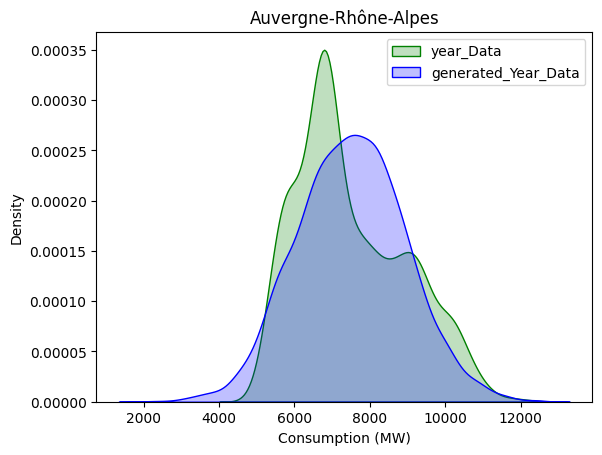

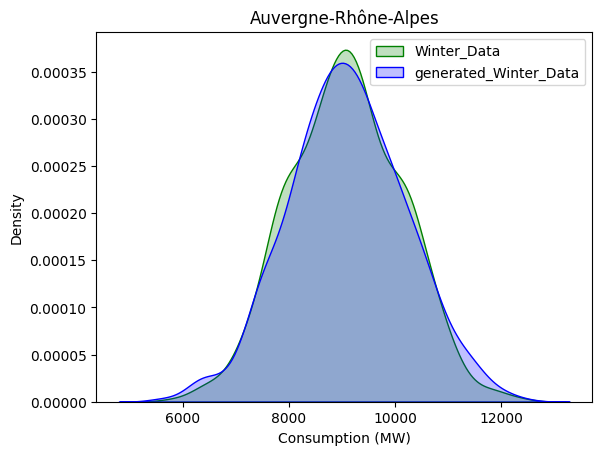

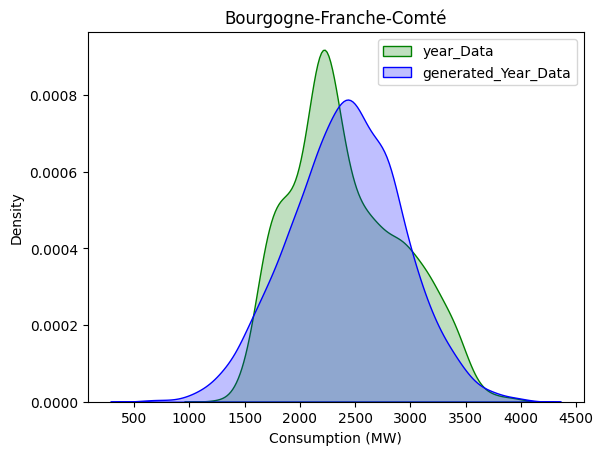

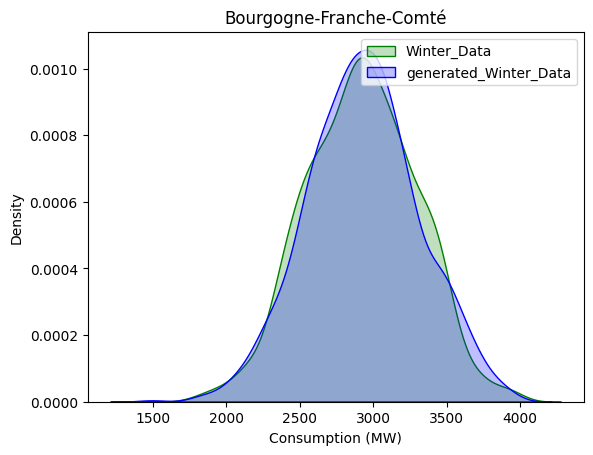

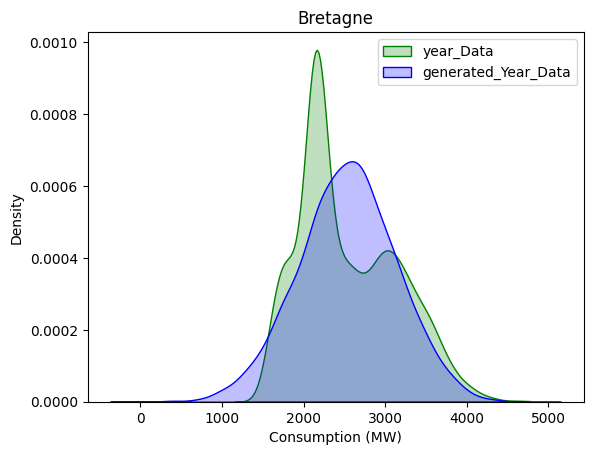

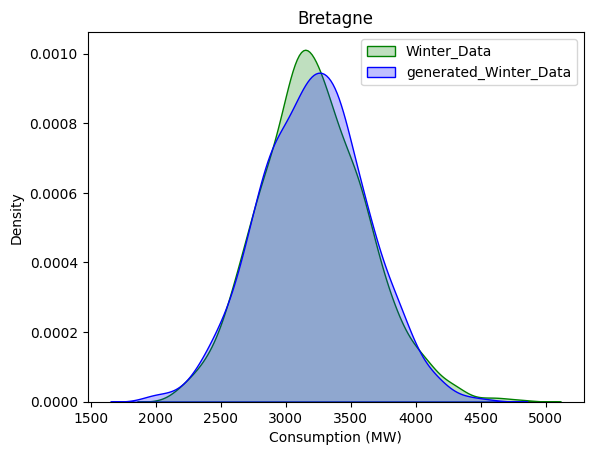

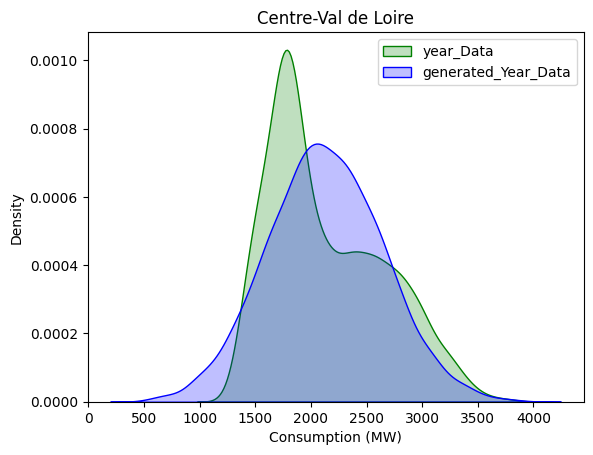

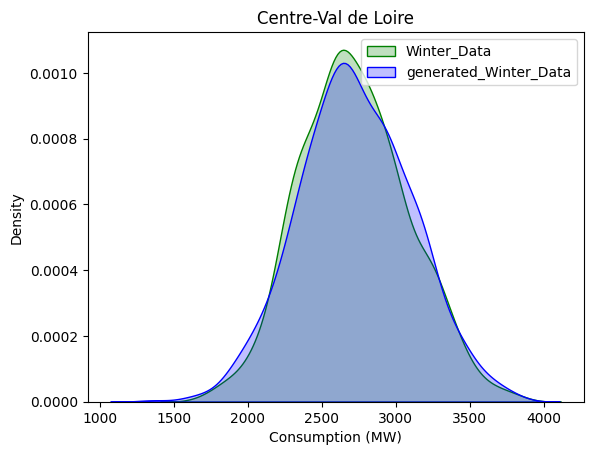

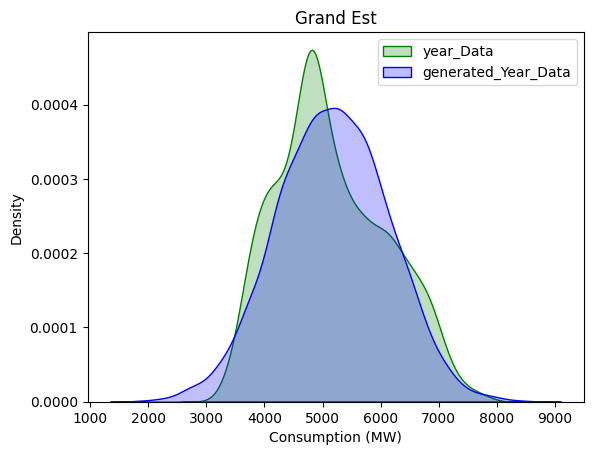

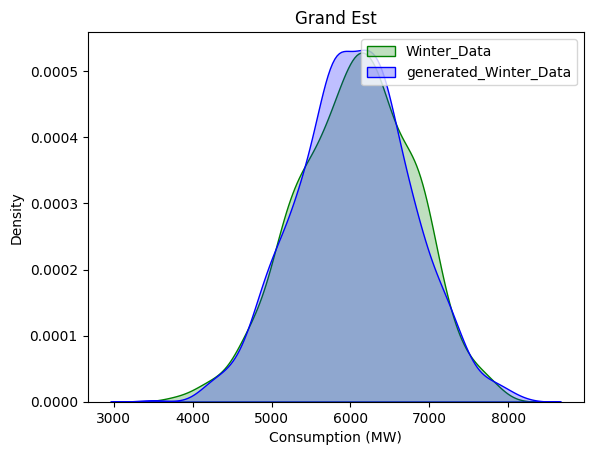

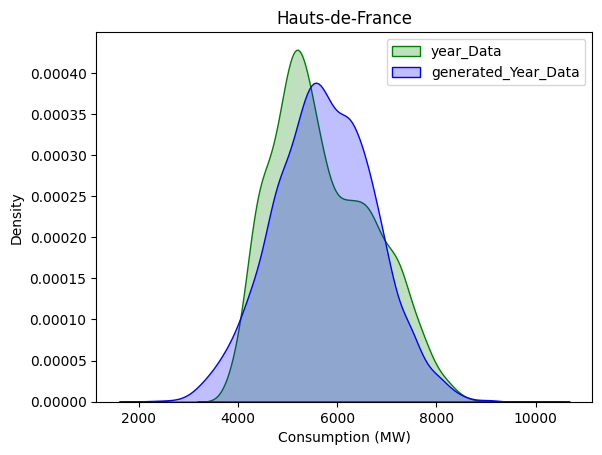

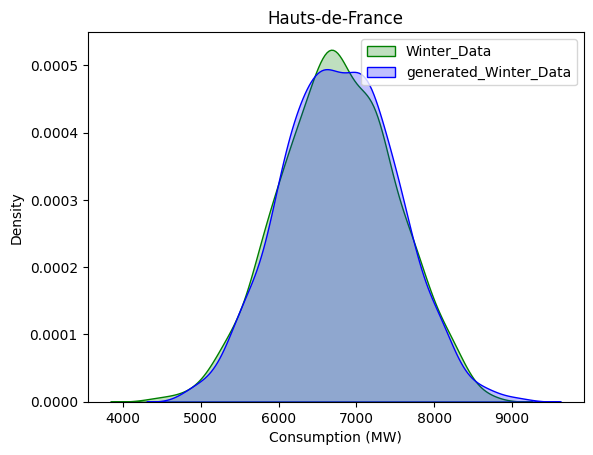

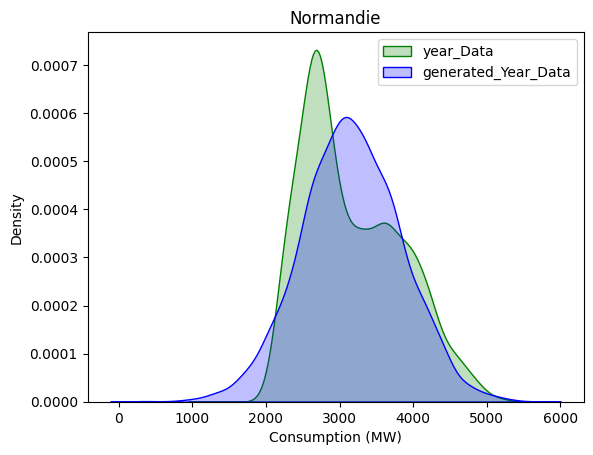

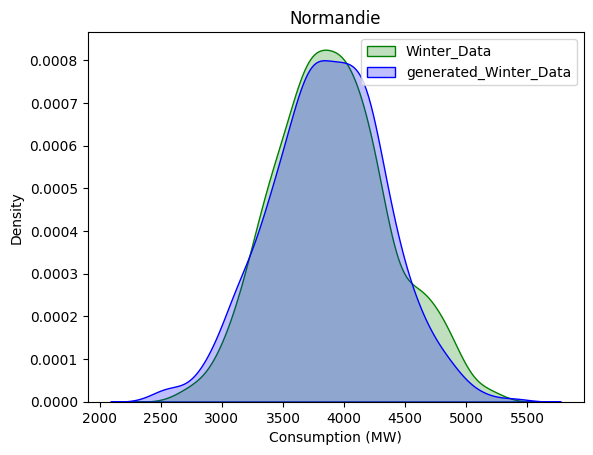

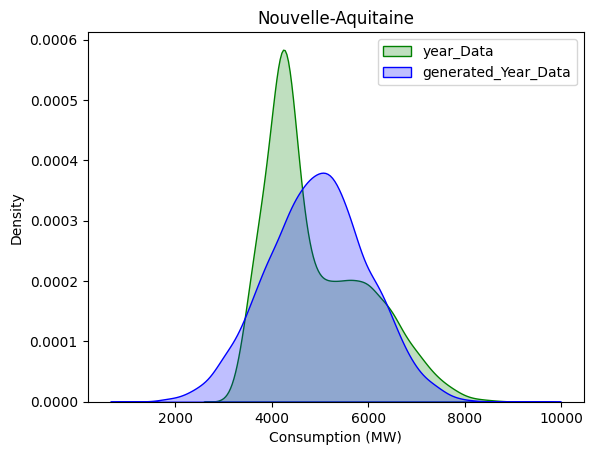

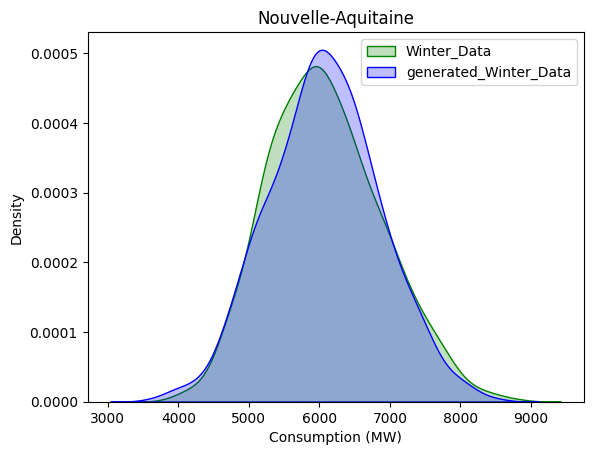

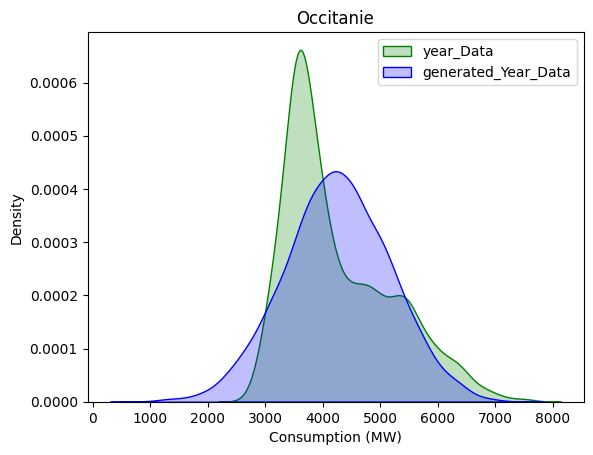

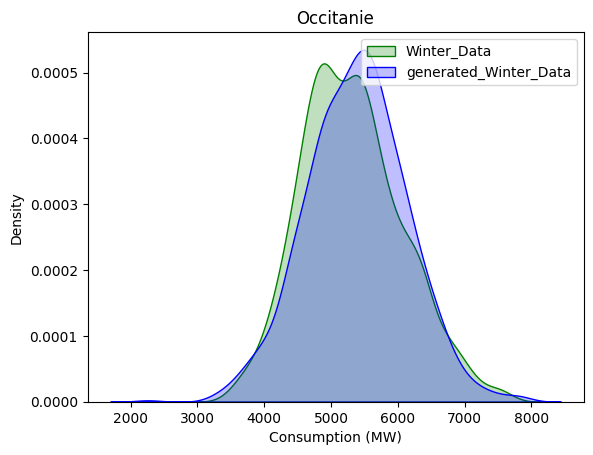

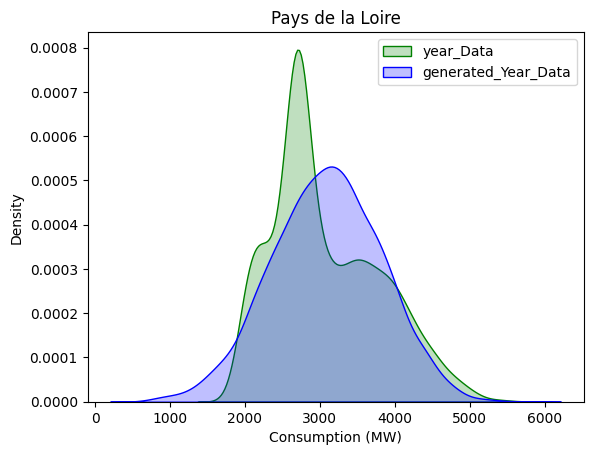

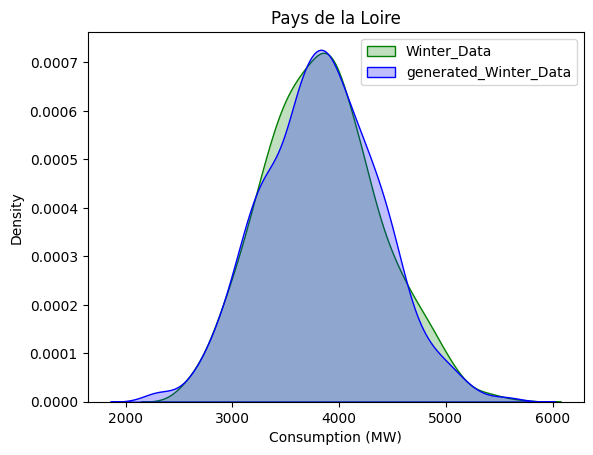

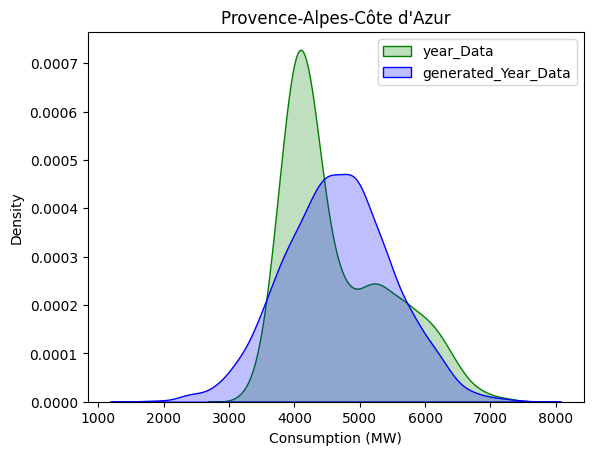

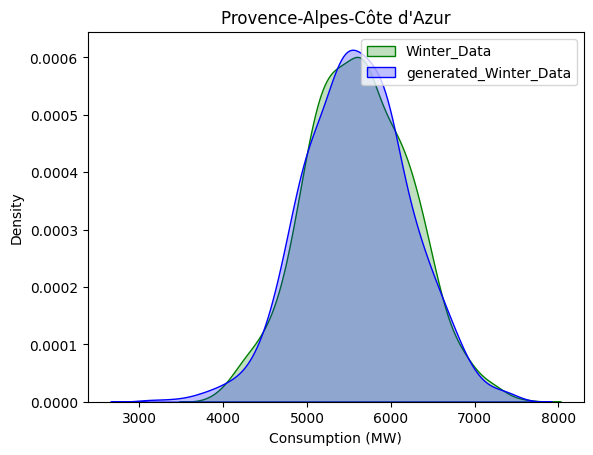

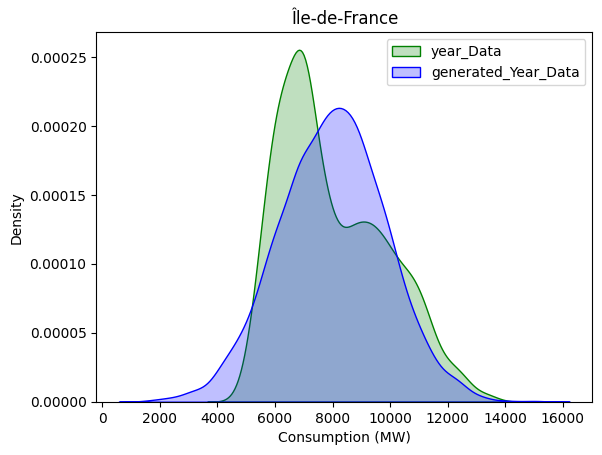

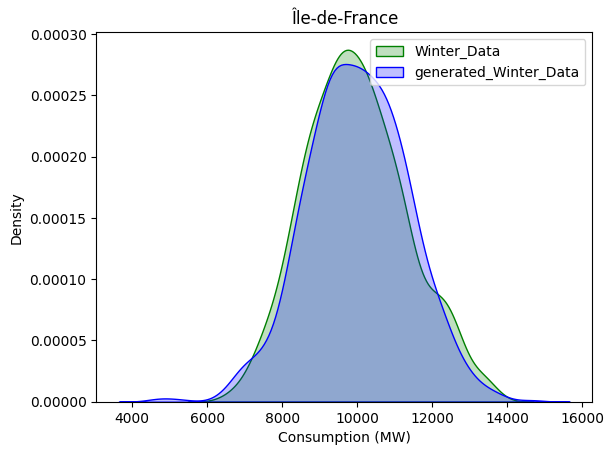

In [258]:
# On visulaise tous les regions pour les donnée sur toute l'année et pour les données en hiver et on compare les results sur un graphique
for indx ,region in enumerate(regions ):
  #representing whole year data comparaison
  new_data = np.random.normal(loc=means[indx], scale=np.sqrt(variances[indx]), size=ns[indx])
  # density (with kde = kernel density estimation)
  df_region = df[df.region == region].copy()
  sns.kdeplot(data=df_region, x="consumption", label="year_Data", color='green', fill=True)
  sns.kdeplot(data=new_data, label="generated_Year_Data", color='blue', fill=True)
  plt.title(region)
  plt.xlabel("Consumption (MW)")
  plt.legend()
  plt.show()


  #representing winter data comparaison
  new_data = np.random.normal(loc=means_winter[indx], scale=np.sqrt(variances_winter[indx]), size=ns_winter[indx])
  # density (with kde = kernel density estimation)
  df_region['date']=pd.to_datetime(df_region['date'])
  mask = ((df_region['date'].dt.month <= 2) | ((df_region['date'].dt.month == 3) & (df_region['date'].dt.day <=21)) |   ((df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)))
  winter_data =df_region[mask]
  sns.kdeplot(data=winter_data, x="consumption", label="Winter_Data", color='green', fill=True)
  sns.kdeplot(data=new_data, label="generated_Winter_Data", color='blue', fill=True)
  plt.title(region)
  plt.xlabel("Consumption (MW)")
  plt.legend()
  plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :
On note par $Y=(X_1,X_2,...,X_n)$ La variable aléatoire associé à la réalisation des observations $x_i$ avec $X_i \sim \mathcal{N}(\mu, \sigma^2)$. De plus On a  $\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)$

Pour déterminer la loi a postiriori on va utiliser la formule suivant : $Π(\mu|Y) = \frac {Π(\mu)Π_\mu(Y)} {m^Y(y)}$ avec $m^Y$ la loi marginale de $Y$

Ceci est à constante prés égale à :    
$$\begin{align}
Π(\mu|y) &∝ Π(\mu)Π_\mu(y)\\
&∝ e^{-\frac {(\mu-μ_0)^2}{2\sigma_0^2}}.e^{-\frac{\sum_{i=1}^n(\mu-x_i)^2}{2σ^2}}\\
&∝e^{-\frac 1 2 [(\frac 1 {σ_0^2}+\frac n {σ^2})\mu^2-2(\frac {\mu_0}{σ_0^2} + \frac {∑_{i=1}^n x_i}{σ^2})\mu]} \\
&∝ e^{-\frac 1 2 \frac {nσ_0^2+σ^2}{σ_0^2σ^2}(\mu^2-2\frac{\mu_0σ^2+σ_0^2∑_{i=1}^nx_i}{nσ_0^2+\sigma^2}\mu)}
\end{align}
$$
On reconnait une loi gaussienne :     
$$
\mu|y \sim \mathcal{N}(\frac{\mu_0σ^2+σ_0^2∑_{i=1}^nx_i}{nσ_0^2+\sigma^2},\frac {σ_0^2σ^2}{nσ_0^2+σ^2})
$$



2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [259]:
ns_year=[]
sigma =400
sigma_0=500
mu_0 = 3500
means_winter_year = []
variances_winter_year =[]
Bretagne = winter_datas[2]
years = [2013 + i for i in range (11)]
year_datas = []
for year in years :
  year_data = winter_datas[2][winter_datas[2]['date'].dt.year == year]
  year_datas.append(year_data)
  n=year_data['date'].count()
  ns_year.append(n)
  mean = (mu_0*sigma**2+sigma_0**2*year_data['consumption'].sum())/(n*sigma_0**2+sigma**2)
  means_winter_year.append(mean)
  var = (sigma**2*sigma_0**2) / (n*sigma_0**2+sigma**2) # la variance peut changer avec le nombre d'echantillion n pour une année donné
  variances_winter_year.append(var)
map_winter_year = {
    'year' : years,
    'count_days' : ns_year,
    'mean' : means_winter_year,
    'variance' : variances_winter_year
    }
dataframe_winter = pd.DataFrame(map_winter_year)
dataframe_winter



,year,count_days,mean,variance
0,2013,90,3343.413504,1765.225066
1,2014,90,3118.424537,1765.225066
2,2015,90,3167.398500,1765.225066
3,2016,91,3207.507639,1745.962462
4,2017,90,3251.224625,1765.225066
5,2018,90,3315.081642,1765.225066
6,2019,90,3195.200794,1765.225066
7,2020,91,3145.504147,1745.962462
8,2021,90,3341.946161,1765.225066
9,2022,90,3165.081642,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

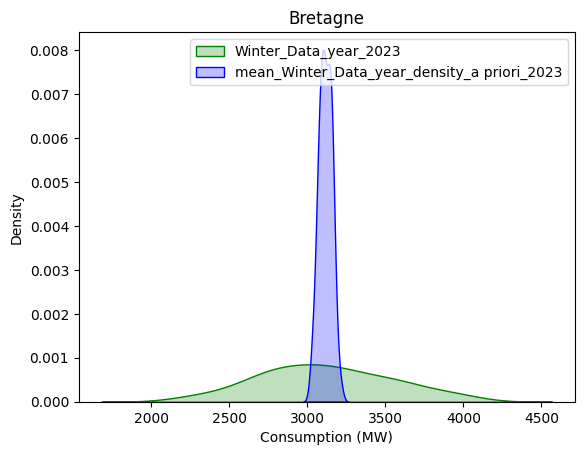

In [260]:
#representing winter data comparaison for year 2023
new_data = np.random.normal(loc=means_winter_year[10], scale=np.sqrt(variances_winter_year[10]), size=ns_year[10])
# density (with kde = kernel density estimation)
sns.kdeplot(data=year_datas[10], x="consumption", label="Winter_Data_year_2023", color='green', fill=True)
sns.kdeplot(data=new_data, label="mean_Winter_Data_year_density_a priori_2023", color='blue', fill=True)
plt.title(regions[2])
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

In [261]:
v=np.sqrt(variances_winter_year[10])
m=means_winter_year[10]
print(f"la valeur de la moyenne en 2013 de la loi a postoriori {m}, et l'ecart type {v}")

la valeur de la moyenne en 2013 de la loi a postoriori 3117.5471230158732, et l'ecart type 44.5435403187374


Votre réponse :
A traves les résultat de cette section on peut conclure que notre incertitude sur les valeur que peut prendre mu est plus faible qu'au pravent. En effet, en introduisant le modèle de la loi de mu a priori on a ajouter de l'information à notre problème et donc on a pus reduire notre incertitude sur la valeur de mu.

Par contre Dans la partie A on a pas eu aucune information sur les probabilité des valeurs que peut prendre mu donc on a implicitement supposé que toutes les valeurs ont les mêmes chances de réalisation.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.


Votre réponse :

On a $X_i \sim \mathcal{N}(\mu, \sigma^2)$ avec  $\mu$ connu et on souhaite tester les hypothèses suivantes :

$ H_0 : σ = 500 $ VS  $H_1 : σ = 400 $

Tout d'abord, on calcule la fonction de vraisamblance et le rapport de vraisamblance:     
$$ \begin{align}
L(x_1,...,x_n;σ)&=∏_{i=1}^n \frac 1 {\sqrt{2π}σ} e^{-\frac 1 2 \frac {(x_i-μ)^2}{σ^2}} = \frac 1 {{\sqrt{2π}}^nσ^n} e^{-\frac 1 2 \frac {∑_{i=1}^n(x_i-μ)^2}{σ^2}}
\end{align}$$
$$ \begin{align}
λ(x_1,...,x_n)=\frac {L(x_1,...,x_n;σ_0)}{L(x_1,...,x_n;σ_1)} &= \frac{{{\sqrt{2π}}^nσ_1^n} e^{-\frac 1 2 \frac {∑_{i=1}^n(x_i-μ)^2}{σ_0^2}}}{{{\sqrt{2π}}^nσ_0^n} e^{-\frac 1 2 \frac {∑_{i=1}^n(x_i-μ)^2}{σ_1^2}}} \\
&=\frac {σ_1^n} {σ_0^n} e^{-\frac 1 2 (\frac 1 {σ_0^2}-\frac 1 {σ_1^2}){∑_{i=1}^n(x_i-μ)^2} }\\
&=\frac {σ_1^n} {σ_0^n} e^{-\frac 1 2 (\frac {σ_1^2-\sigma_0^2}{σ_0^2\sigma_1^2}){∑_{i=1}^n(x_i-μ)^2} }
\end{align}$$
D'après le theorème de Neuman Pearson le test UPP est donnée par $λ(x_1,...,x_n)<K_α$ pour la region de rejet de $H_0$
on pose alors $T(x_1,...,x_n) =∑_{i=1}^n\frac {(x_i-\mu)^2}{\sigma_0^2}$

on a $σ_0^2>\sigma_1^2$ donc $λ(x_1,...,x_n)$ est une fonction croissante de $T(x_1,...,x_n)$ donc $λ(x_1,...,x_n)<K_α ⇔ T(x_1,...,x_n)< K_α'$

Sous H0 ; $X_i \sim \mathcal{N}(\mu, \sigma_0^2)$
Donc $$\begin{align}
P(λ(x_1,...,x_n)<K_\alpha |H_0) = α &⇔P(T(x_1,...,x_n)< K_α'|H_0) = α\\
&⇔P(\frac{∑_{i=1}^n(x_i-\mu)^2} {σ_0^2} < {K_α'} |H_0)= α\\
\end{align}$$
Or $\frac {X_i-\mu} {σ_0^2}\sim \mathcal{N}(0, 1) $
Donc $\frac{∑_{i=1}^n(x_i-\mu)^2} {σ_0^2} \sim \mathcal{X^2}(n)$
D'ou $ {K_α'}  = q_α^{\mathcal{X^2}(n)}$ avec q est le quantile de la loi de chi 2 de paramtère n.

Finallement, la régle de decision est donnée par :    
$δ_α^*(x_1,...,x_n) = 1 si \frac {∑_{i=1}^n(x_i-\mu)^2}{σ_0^2}< q_α$

et $δ_α^*(x_1,...,x_n) =0 $ sinon

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [262]:
alpha = 0.01  # Niveau de confiance de 99%
Bretagne_winter_data = year_datas[10]
sigma_0=500
n  = Bretagne_winter_data['date'].count()
quantile = chi2.ppf(alpha, n)
T=(((Bretagne_winter_data['consumption'].values-3200)**2).sum())/(sigma_0**2)
if(T<quantile):
  print(f"La règle de décision a donné 1 avec T={T} et le seuil q={quantile} donc on rejete H_0 (on rejete sigma =500 MW) et on accepte H_1 (sigma = 400)" )
else :
  print(f"La règle de décision a donné 0 avec T={T} et le seuil q={quantile} donc on accepte H_0 (sigma =500 MW) " )


La règle de décision a donné 0 avec T=58.400252 et le seuil q=53.540077291078724 donc on accepte H_0 (sigma =500 MW) 


En appliquant la règele de decision, on affirme qu'à niveau 0.01 on accepte l'hypothese de $\sigma = 500$.

Dans la cellule suivante on dessine la destribution de la loi chi2 anisi que le seuil de décision.

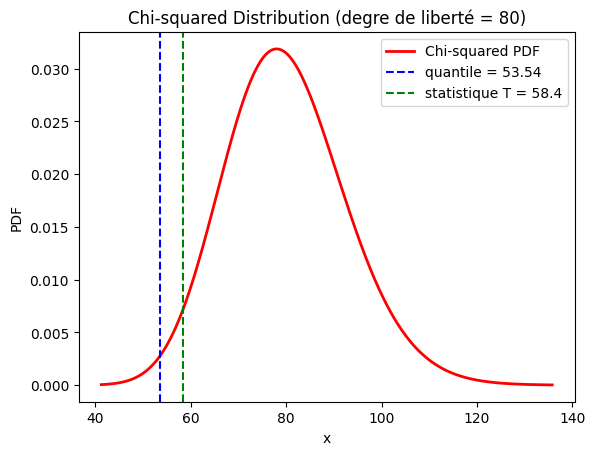

In [263]:
x = np.linspace(chi2.ppf(0.0001, n), chi2.ppf(0.9999, n), 10000)
pdf = chi2.pdf(x, n)
plt.plot(x, pdf, 'r-', lw=2, label='Chi-squared PDF')
plt.axvline(x=quantile, color='b', linestyle='--', label=f'quantile = {np.round(quantile,3)}')
plt.axvline(x=T, color='g', linestyle='--', label=f'statistique T = {np.round(T,3)}')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title(f'Chi-squared Distribution (degre de liberté = {n})')
plt.legend()
plt.show()

## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

Pour visualiser la loi joint de ces deux variable on va utiliser la fonction kde pour faire l'estimation comme on a fait dans le cas d'une fonction monovariable et on marquera en rouges les données réelles

In [264]:
def plot_joint (X,Y):
  # creation de l'estimation de la loi en utilisant sns.kdeplot comme dans la partie A mais cette fois avec 2 variables
  sns.kdeplot(x=X, y=Y, cmap="Blues", fill=True,)
  sns.scatterplot(x=X, y=Y, color='red', marker='x', s=3)
  # ajout des titres
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Bivariate Density Estimation")

  cax = plt.axes([0.95, 0.15, 0.02, 0.7])  # [x, y, width, height]
  h = plt.imshow([[0, 1]], cmap="Blues", vmin=0, vmax=1)
  plt.colorbar(h, cax=cax, label="Density")

  plt.show()


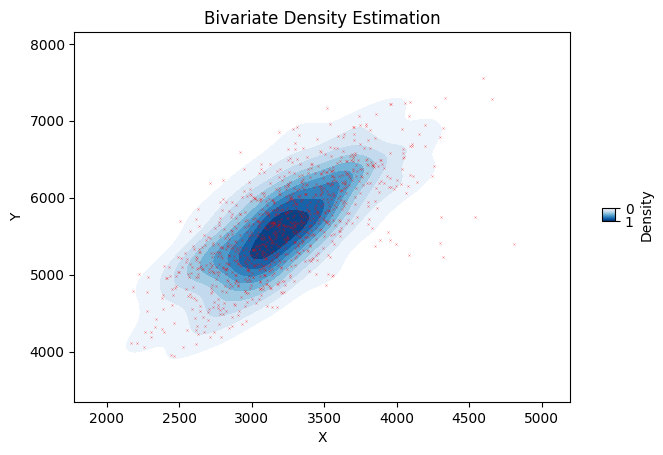

In [265]:
X_data = winter_datas[2]["consumption"].values #region de Bretagne en hiver
Y_data = winter_datas[10]["consumption"].values #region de Provence-Alpes-Côte d'Azur en hiver
plot_joint(X_data,Y_data)

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Pour avoir une intuition, on va visualiser l'allure de la loi conjointe de deux variable aleatoire indépendantes qui suivent la loi gaussien. Donc on va tracer l'allure pour 2 nouveaux données génerer aléatoirement d'une façon independente

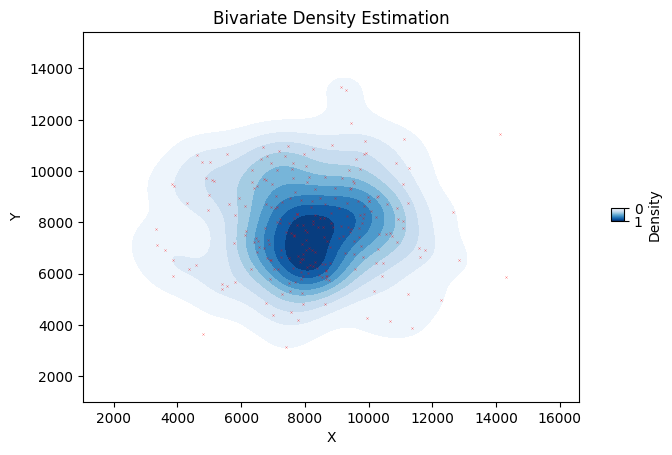

In [266]:
X=np.random.normal(loc=moyenne_emprique, scale=np.sqrt(variance_emprique), size=3*n)
Y=np.random.normal(loc=moyenne_emprique, scale=np.sqrt(variance_emprique), size=3*n)
plot_joint(X,Y)

Votre réponse :

A travers cette figure on peut dire que la loi conjointe de deux variable gaussienne indépendantes a comme ligne de niveau des formes cerclulaire concentrique.
Dans le cas nos données, l'estimation de la loi donnée présente plutôt des lignes de niveau allengées  (sous forme de ellipse ).
Donc je pense qu'il est fort probable que ces deux variabeles sont dependantes

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$.

Dans notre cas on sait que les deux variables X et Y sont des variables continues par contre le test du Chi-2 pour l'indépendance est un test pour les variables catégorique (discrete). Donc on va diviser le plan de réalisation de couple X,Y qui est $R^2$ en des régions et on va associer à chaque région une catégorie. Ce qui nous rammènera dans le cas discret. Donc on va construire une partition de $R^2$ en tenant compte de l'hypthèse de ce test qui mentionne que les fréquences attendues $np_{0j}$ doivent rester supérieures à 5 avec n est la taille de l'échantillion et $p_{0j}$ est la probabilité qu'on a la catégorie j sous l'hypothese null. Les hypothèses du notre test sont :

**H0 :** La consommation entre les 2 régions est indépendante.

**H1 :** La consommation entre les 2 régions n'est pas indépendante.

La construction se basera sur le fait que sous l'hypthese null on a pour une categorie j $p_{0} = p_{0x}p_{0y}$. Pour simplifier on va choisir que $p_{0x}=p_{0y} = 3/\sqrt{n}$. En fait ceci va garentir que $np_{0}≥9≥5$

In [267]:
def get_quantiles(X,step):
  mean_X = X.mean()
  n=X.size
  variance_X =  ((X-mean_X)**2).sum() / (n-1)
  quantiles = [X.min()-1]
  nbr_steps =int(np.floor(1/step))
  for i in range(1, nbr_steps):
      cdf_value = i*step
      quantile = norm.ppf(cdf_value, loc=mean_X, scale=np.sqrt(variance_X))
      quantiles.append(quantile)
  quantiles.append(X.max()+1)
  return quantiles
n=X_data.size
quantiles_X = get_quantiles(X_data,3/np.sqrt(n))
quantiles_Y = get_quantiles(Y_data,3/np.sqrt(n))

Aprés avoir obtenu les quantiles nécessaires, on va visualiser les différentes régions dans la cellule suivante. Une catégorie i sera associer à une zone rectangulaire limitée par deux lignes bleues successives et deux lignes rouges successives (pour les extrimité on consdère les parties du plan limitées seulement par 3 droites )

le nombre de categories est 100


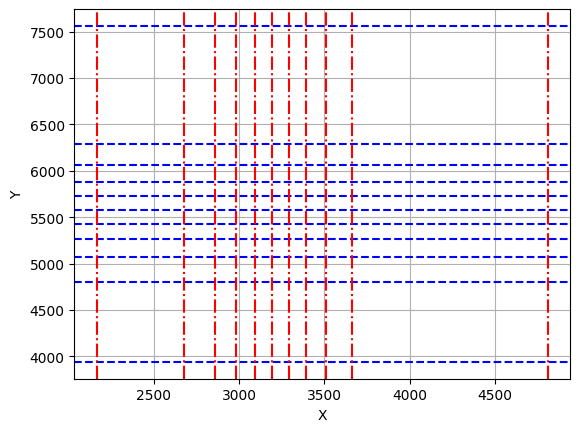

In [268]:
X_values = quantiles_X
Y_values = quantiles_Y
print(f"le nombre de categories est {(len(X_values)-1)*(len(Y_values)-1)}")
fig, ax = plt.subplots()
# Plot horizontal lines y = Y_value
for Y_value in Y_values:
    ax.axhline(y=Y_value, color='b', linestyle='--')
# Plot vertical lines x = X_value
for X_value in X_values:
    ax.axvline(x=X_value, color='r', linestyle='-.')
# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Show the plot
plt.grid(True)
plt.show()

Maintenant on va affecter chaque réalisation de l'échantillion à une catégorie et on va compter le nombre d'occurence de chaque catégorie dans un tableau N et on va calculer les probabilités d'appartenance de ces catégories sous l'hypthese 0 dans un tableau p

In [269]:
# find_index set a trouver les bornes de l'interval qui contient une valeur x dans une listes des bornes X ordonné
def find_index(X,x) :
  index = np.searchsorted(X, x, side='right')
  position = index-1
  if(position== -1):
    position = 0
  return position

nbr_c= (len(quantiles_X)-1)*(len(quantiles_Y)-1) # nombre de catégories on va associer un nombre i à la categorie dans la region i
categories = [] # ici on mettera les labels des points categories[i] est le label de réalisation i
for i in range(len(X_data)):
  x,y=X_data[i],Y_data[i]
  categories.append(find_index(quantiles_X,x)*(len(quantiles_Y)-1)+find_index(quantiles_Y,y)) # on mettera un tableau 1 D qui represente tous les labels

# maintenant on calcule l'apparition des donnée dans chaque catégorie
N=np.zeros(nbr_c)
for i in categories :
  N[i-1]+=1

# compute_p_region calculera la probabilté de la region de la forme [x_i,x_i+1] avec la loi gaussienne. cette fonction sera utilie pour calculer la porbabilité joint de deux variable indépendantes
def compute_p_region (Y_data,quantiles_Y,i):
  x=np.linspace( quantiles_Y[i],quantiles_Y[i+1],10000)
  y=norm.pdf(x,loc=Y_data.mean(),scale=np.sqrt(((Y_data-Y_data.mean())**2).sum() / (n-1)))
  return np.trapz(y,x)

# Par construction la probabilité d'une classe i est égale à 9/n pour presque toutes les regions sauf pour le cas du premier et dernier quantile qu'on a choisit pour des raison
# de representation numérique parcequ'on ne peut pas mettre -inf et +inf comme des reels. mais on va vérfier aussi ce resultat en calculant les differentes probabilité
p=np.ones_like(N)*9/n
for i in range (len(quantiles_X)-1):
  for j in range (len(quantiles_Y)-1):
    p[i*(len(quantiles_Y)-1)+j]=compute_p_region(X_data,quantiles_X,i)*compute_p_region(Y_data,quantiles_Y,j)

# Enfin on verifie bien la condition du test : n*p >=5
print("les valeur de n*p sont entre ",(n*p).min()," et ",(n*p).max())

les valeur de n*p sont entre  8.190840387469123  et  18.689638950886042


Maintenant on a les differentes catégories$c_1,...,c_s$ et les differentes probabilté d'apparition respectives $p_1,...,p_s$ sous l'hypothese 0 avec s le nombre des catégories différentes. Ainsi que les différentes réalisation des variables aléatoires $ N_1, ..., N_s $ qui correspondent aux fréquences
respectives des s catégories après n observations. Donc notre problème est prés à être traité dans le cadre de test de chi-2 de l'indépendance.

La statistique du test est donnée par : $Q=∑_{j=1}^s \frac {(N_j-np_{0j})^2}{np_{0j}}$
qui sous $H_0$ admet une loi asymptotique de $\mathcal{X^2}(s-1)$ .
D'après le test du khi-deux de Pearson de niveau $\alpha$ on rejette $H_0$ pour de grandes valeurs de réalisation $q$ de $Q$ si $q>\mathcal{X_{1-α}^2}(s-1)$

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [270]:
alpha = 0.01
#calcule de la statistique de test
q=((N-n*p)**2/(n*p)).sum()

# Calcule du quantile (1 - alpha)
quantile = chi2.ppf(1 - alpha, nbr_c)

print(f"A un niveau alpha = {alpha} le seuil est {quantile} et la valeur de la statistique du test est {q}")
if(q>quantile) :
  print("On rejete l'hypthese H_0 et on accepte l'hypothese H_1 : Les deux variables sont dépendantes")
else :
  print("On accepte l'hypthese H_0  : Les deux variables sont indépendantes")

A un niveau alpha = 0.01 le seuil est 135.80672317102676 et la valeur de la statistique du test est 843.1771078377466
On rejete l'hypthese H_0 et on accepte l'hypothese H_1 : Les deux variables sont dépendantes


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

On cherche un intervalle de confiance de niveau  $α =0.95$ pour le
paramètre µ. Ici, la variance est inconnu. Donc on va remplacer $\sigma^2$ par son estimateur empirique non biaisé :     
$\hat {S^2_n} = \frac 1 {n-1}\sum_{i=1}^n(X_i-\bar X_n)^2$

On pose $ϕ(X,\mu) =\frac  {\sqrt n (\bar X_n - \mu )} {\hat S_n }$ On remarque alors que $T =ϕ(X,\mu)  \sim \mathcal{T}(n-1) $ qui est indépendante des paramètres.

Puisque la loi de student est unimodale et de mode 0, l'intervalle de plus petit largeur est un intervalle symétrique de la forme [-a,a] par conséquent:
$P_{\mu , \sigma^2} (-t_{n-1}(1-\frac{1- {\alpha}} 2)\le ϕ(X,\mu) \le t_{n-1}(1-\frac{1- {\alpha}} 2 )) = \alpha $ Ce qui aboutit à $P_{\mu , \sigma^2} ( \bar {X_n} -  \hat {S_n}\frac {t_{n-1} (1- \frac {1-\alpha}{2})}{\sqrt n}\le \mu \le  \bar {X_n} +  \hat {S_n}\frac {t_{n-1} (1- \frac {1-\alpha}{2})}{\sqrt n} )=\alpha$
avec $t_{n-1}(p)$ désinge le p-quantile de la loi $\mathcal{T}(n-1)$


In [271]:
winter_data_23 = year_datas[10]['consumption'] # on obtient les données de la region de Bretagne de l'hiver 2023
n_winter_23 = winter_data_23.count()
t_alpha = 1.99045 # la valuer de quantile 0.975 pour un degre de liberté (n_winter23) - 1
x_bar = winter_data_23.mean()
S_hat = np.sqrt(((winter_data_23-x_bar)**2).sum()/(n_winter_23 - 1))
min_interval = x_bar-S_hat*(t_alpha/np.sqrt(n_winter_23))
max_interval = x_bar+S_hat*(t_alpha/np.sqrt(n_winter_23))
print(f"l'intervalle de confiance à niveau 95% pour la moyenne de la consommation d'électricité est donnée par [{min_interval},{max_interval}]")

l'intervalle de confiance à niveau 95% pour la moyenne de la consommation d'électricité est donnée par [3020.754956975793,3208.2200430242074]


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

On pose $\mu_0=3100$ MW et $\alpha = 5 \% $ , les hypothèses à tester sont :

**H0** : $\mu=\mu_0 $

**H1** : $\mu \neq \mu_0$

à un niveau $\alpha = 0.05$

On accepte $H_0$ au niveau $\alpha$ si et seulement si:     
$-t_{n-1}(1-\frac{{\alpha}} 2)\le \frac  {\sqrt n (\bar X_n - \mu_0 )} {\hat S_n } \le t_{n-1}(1-\frac{ {\alpha}} 2 )$

Qu'on peut écrire sous la facon suivant : $\bar {X_n} -  \hat {S_n}\frac {t_{n-1} (1- \frac {\alpha}{2})}{\sqrt n}\le \mu_0 \le  \bar {X_n} +  \hat {S_n}\frac {t_{n-1} (1- \frac {\alpha}{2})}{\sqrt n}$

Donc pour que la valeur de $µ_0$ hypothétique soit acceptée il faut et
il suffit qu’elle soit dans cet interval (même  interval que précédemment c'est la dualité entre ces deux approches) . Or on a déja calculer les bornes de cet interval donc il suffit de tester si $\mu_0$ apparatient à cet intervalle ou non

In [272]:
mu_0=3100
if(mu_0>=min_interval  and mu_0<=max_interval ) :
  print(f"mu_0 appartient à l'intervalle ({min_interval},{max_interval}). Donc on accepte H_0 : mu=3100MW  ")
else :
  print(f"mu_0 n'appartient pas à l'intervalle ({min_interval},{max_interval}). Donc on rejete H_0 et on accepte H_1 : mu != 3100MW")

mu_0 appartient à l'intervalle (3020.754956975793,3208.2200430242074). Donc on accepte H_0 : mu=3100MW  
